In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import graphviz
import pyarrow
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
# from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [168]:

file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\Award_Batting_HOF_FE.csv'
Awards_Batting_HoF_df = pd.read_feather(file_path)

Awards_Batting_HoF_df.describe()
# OG
# Awards_Batting_HoF_df = pd.read_feather("Awards_Batting_HoF.feather")

,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,total_RBI,...,total_SF,total_GIDP,max_HR,max_hits,max_SB,total_singles,batting_avg,OBP,SLG,OPS
count,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.00000,18724.000000,18724.000000,...,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,18724.000000,16704.000000,16747.000000,16704.000000,16704.000000
mean,5.014847,292.557306,821.013726,110.233390,216.627857,76.078883,36.578936,7.77382,16.192373,99.211280,...,3.789468,12.489746,3.299829,39.441198,4.134426,156.082728,0.190792,0.240878,0.213811,0.452734
std,4.617795,527.807546,1891.249653,291.755375,544.659428,207.432638,95.414644,25.12887,57.666437,270.931057,...,12.846341,36.537840,7.419488,58.048645,10.283106,386.701877,0.119200,0.136246,0.138644,0.262312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,13.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.125000,0.168230,0.131828,0.304944
50%,3.000000,77.000000,71.000000,6.000000,12.000000,4.000000,2.000000,0.00000,0.000000,4.000000,...,0.000000,0.000000,0.000000,8.000000,0.000000,10.000000,0.213052,0.263158,0.232692,0.500000
75%,7.000000,327.000000,605.000000,63.000000,133.000000,40.000000,21.000000,4.00000,4.000000,54.000000,...,0.000000,4.000000,2.000000,58.000000,3.000000,101.000000,0.256410,0.317638,0.294750,0.610403
max,27.000000,5700.000000,21752.000000,3992.000000,7028.000000,3416.000000,1584.000000,618.00000,1146.000000,4152.000000,...,236.000000,630.000000,73.000000,262.000000,138.000000,5286.000000,1.000000,1.000000,2.000000,3.000000


In [169]:
# Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']] = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP', 'BattingPost_df_G', 'BattingPost_df_AB', 'BattingPost_df_R', 'BattingPost_df_H', 'BattingPost_df_2B', 'BattingPost_df_3B', 'BattingPost_df_HR', 'BattingPost_df_RBI', 'BattingPost_df_SB', 'BattingPost_df_CS', 'BattingPost_df_BB', 'BattingPost_df_SO', 'BattingPost_df_IBB', 'BattingPost_df_HBP', 'BattingPost_df_SH', 'BattingPost_df_SF', 'BattingPost_df_GIDP']].abs()

X = Awards_Batting_HoF_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]]

In [170]:
print(Awards_Batting_HoF_df.columns.tolist())
Awards_Batting_HoF_df.info()

['playerID', 'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits', 'total_walks', 'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB', 'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits', 'max_SB', 'HOF_status', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18724 entries, 0 to 18723
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   playerID         18724 non-null  object 
 1   years_played     18724 non-null  int64  
 2   total_games      18724 non-null  float64
 3   total_at_bats    18724 non-null  float64
 4   total_runs       18724 non-null  float64
 5   total_hits       18724 non-null  float64
 6   total_walks      18724 non-null  float64
 7   total_doubles    18724 non-null  float64
 8   total_triples    18724 non-null  float64
 9  

In [171]:
Awards_Batting_HoF_df.head()

,playerID,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,...,total_GIDP,max_HR,max_hits,max_SB,HOF_status,total_singles,batting_avg,OBP,SLG,OPS
0,aardsda01,9,331.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
1,aaronha01,23,3298.0,12364.0,2174.0,3771.0,1402.0,624.0,98.0,755.0,...,328.0,47.0,223.0,31.0,True,2294.0,0.304998,0.375781,0.435053,0.810834
2,aaronto01,7,437.0,944.0,102.0,216.0,86.0,42.0,6.0,13.0,...,36.0,8.0,77.0,6.0,False,155.0,0.228814,0.293204,0.262712,0.555916
3,aasedo01,13,448.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,False,0.0,0.000000,0.000000,0.000000,0.000000
4,abadan01,3,15.0,21.0,1.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,False,2.0,0.095238,0.240000,0.095238,0.335238


In [172]:
#Awards_Batting_HoF_df = Awards_Batting_HoF_df.drop_duplicates(subset=['playerID'])

In [173]:
# OG
# X = Awards_Batting_HoF_df[['Batting_df_G', 'Batting_df_AB', 'Batting_df_R', 'Batting_df_H', 'Batting_df_2B', 'Batting_df_3B', 'Batting_df_HR', 'Batting_df_RBI', 'Batting_df_SB', 'Batting_df_CS', 'Batting_df_BB', 'Batting_df_SO', 'Batting_df_IBB', 'Batting_df_HBP', 'Batting_df_SH', 'Batting_df_SF', 'Batting_df_GIDP']]
X = Awards_Batting_HoF_df[[
    'years_played', 'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_walks', 'total_doubles', 'total_triples', 'total_home_runs',
    'total_RBI', 'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR', 'max_hits',
    'max_SB', 'total_singles', 'batting_avg', 'OBP', 'SLG', 'OPS'
]].fillna(0)  # Replace NaNs with 0

# Ensure the target variable has no missing values
y = Awards_Batting_HoF_df['HOF_status'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model_1 = LogisticRegression()
log_model_1.fit(X_train_scaled, y_train)

y_pred = log_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Reset indices for alignment
y_test_reset = y_test.reset_index(drop=True).astype(np.int_)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index).astype(np.int_)

# Identify false positives and false negatives
false_positives = y_test_reset[(y_test_reset == 0) & (y_pred_reset == 1)].index
false_negatives = y_test_reset[(y_test_reset == 1) & (y_pred_reset == 0)].index

# Extract player details for false positives and false negatives
false_positive_players = Awards_Batting_HoF_df.loc[false_positives, ['playerID', 'HOF_status']]
false_negative_players = Awards_Batting_HoF_df.loc[false_negatives, ['playerID', 'HOF_status']]

# Display the results
print("False Positives:")
print(false_positive_players)

print("\nFalse Negatives:")
print(false_negative_players)

Confusion Matrix:
[[3692    5]
 [  29   19]]

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      3697
        True       0.79      0.40      0.53        48

    accuracy                           0.99      3745
   macro avg       0.89      0.70      0.76      3745
weighted avg       0.99      0.99      0.99      3745

False Positives:
       playerID  HOF_status
308   anderbr04       False
1194  bernajo01       False
1997  brownll01       False
2339  cabrace01       False
3482  cottsne01       False

False Negatives:
       playerID  HOF_status
105   adkinhe01       False
194   allenfr01       False
223   allisdo01       False
256   altizda01       False
282   alvorbi01       False
351   andreel01       False
445   arnovmo01       False
463   asbjoca01       False
526   averiea01        True
797   baronst01       False
966   bearega01       False
1125  benneda01       False
1253  bevacku01       False
1890  bro

In [174]:
# Display detailed feature values for false positives
print("\nDetailed Feature Values for False Positives:")
display(Awards_Batting_HoF_df.loc[false_positives, X.columns])


Detailed Feature Values for False Positives:


,years_played,total_games,total_at_bats,total_runs,total_hits,total_walks,total_doubles,total_triples,total_home_runs,total_RBI,...,total_SF,total_GIDP,max_HR,max_hits,max_SB,total_singles,batting_avg,OBP,SLG,OPS
308,7,123.0,65.0,1.0,6.0,5.0,3.0,0.0,0.0,4.0,...,0.0,2.0,0.0,4.0,0.0,3.0,0.092308,0.157143,0.092308,0.249451
1194,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1997,12,404.0,552.0,54.0,106.0,38.0,21.0,9.0,4.0,59.0,...,0.0,0.0,2.0,22.0,1.0,72.0,0.192029,0.244068,0.222826,0.466894
2339,3,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3482,10,483.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.500000,0.500000,1.000000


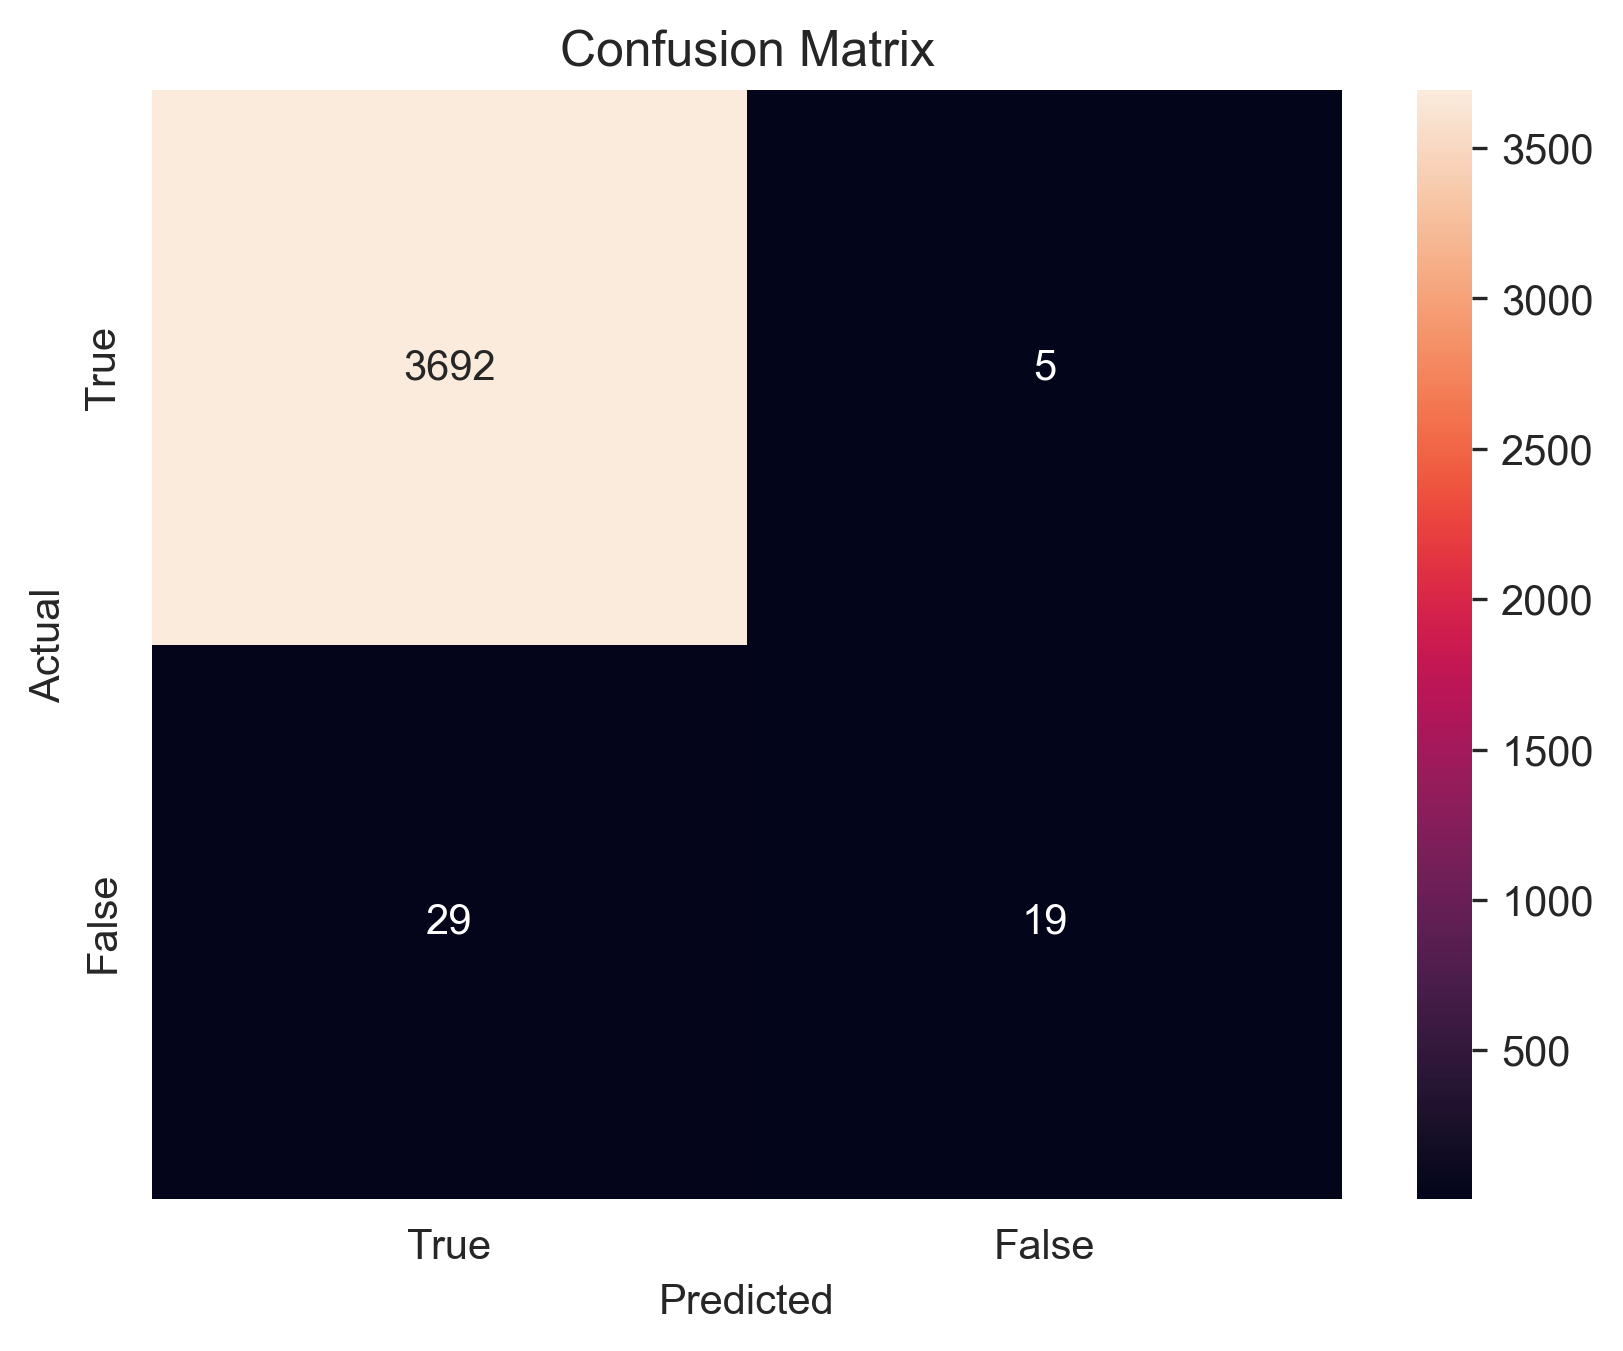

<Figure size 1920x1440 with 0 Axes>

In [175]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('log_model_1.png')

In [176]:
importance = log_model_1.coef_[0]  
feature_names = X.columns  

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
print(importance_df)

            Feature  Importance  Absolute Importance
20         max_hits   -2.216111             2.216111
3        total_runs    2.178624             2.178624
1       total_games    1.705119             1.705119
24              OBP   -1.220878             1.220878
9         total_RBI    1.134757             1.134757
6     total_doubles   -0.976593             0.976593
2     total_at_bats    0.657621             0.657621
19           max_HR   -0.619123             0.619123
25              SLG    0.593726             0.593726
13         total_SO    0.566516             0.566516
21           max_SB   -0.557820             0.557820
4        total_hits   -0.489432             0.489432
22    total_singles   -0.402577             0.402577
16         total_SH    0.380624             0.380624
8   total_home_runs   -0.320393             0.320393
26              OPS   -0.311992             0.311992
15        total_HBP   -0.275708             0.275708
10         total_SB    0.268382             0.

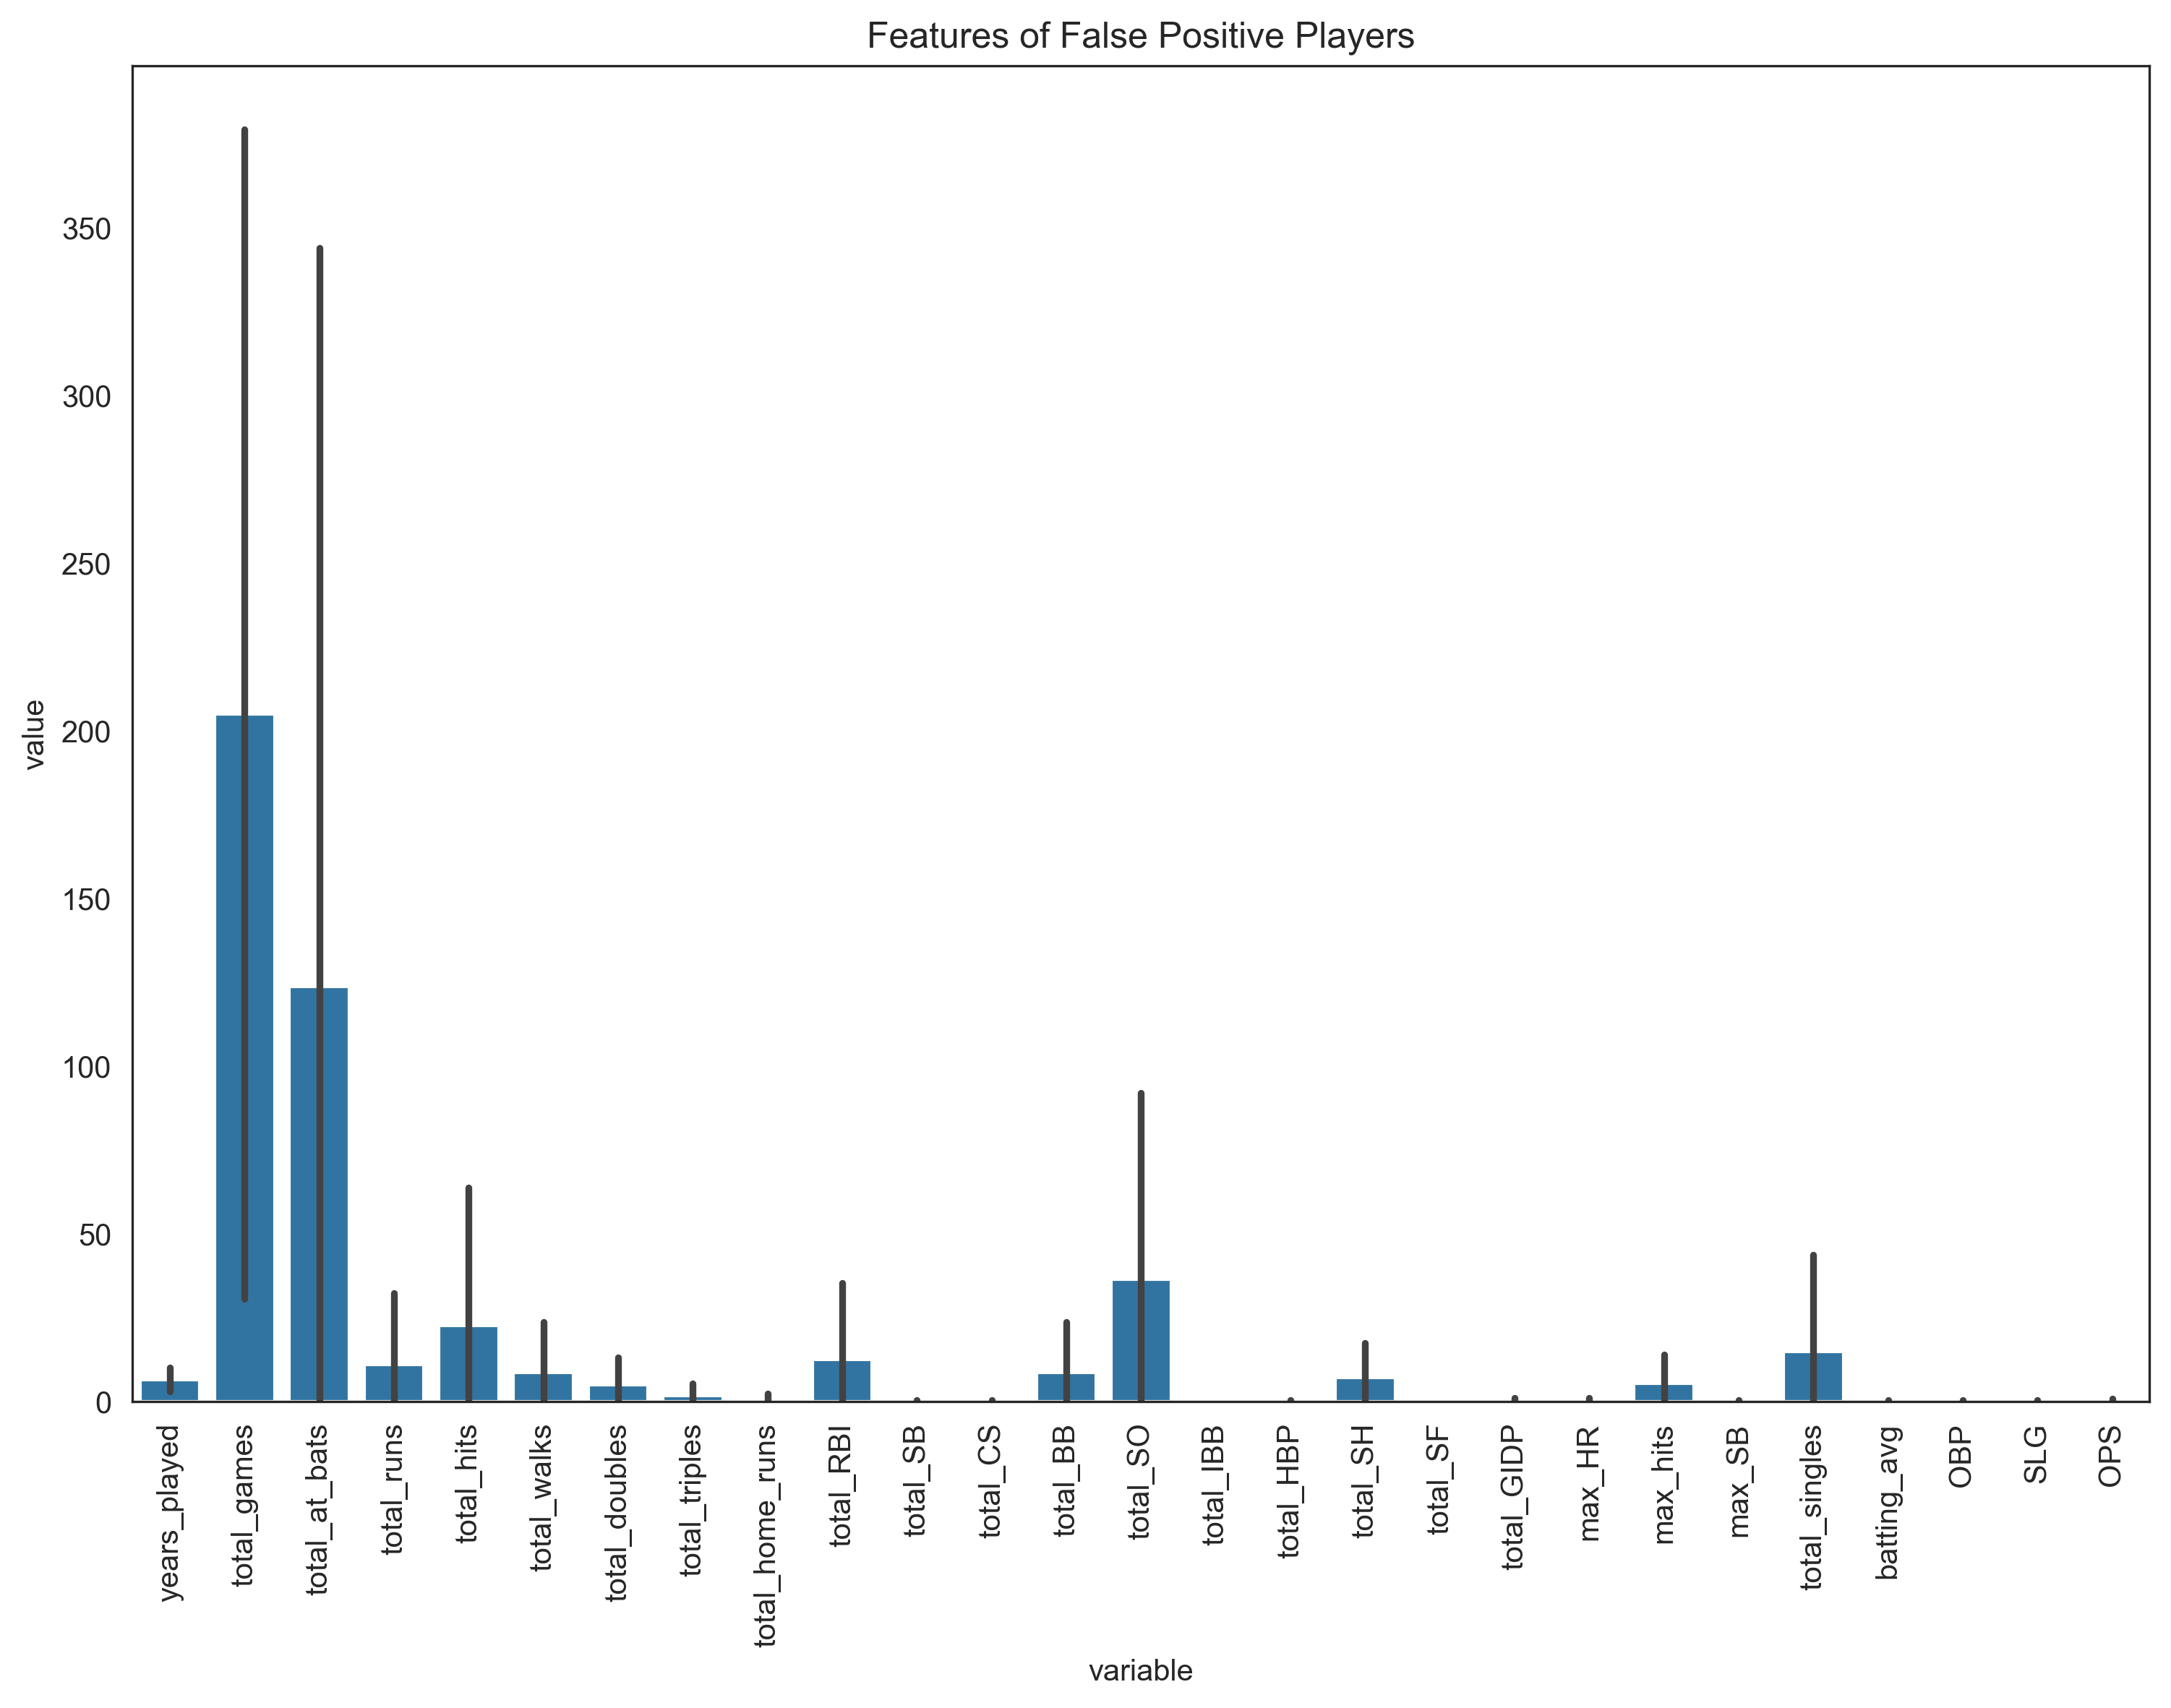

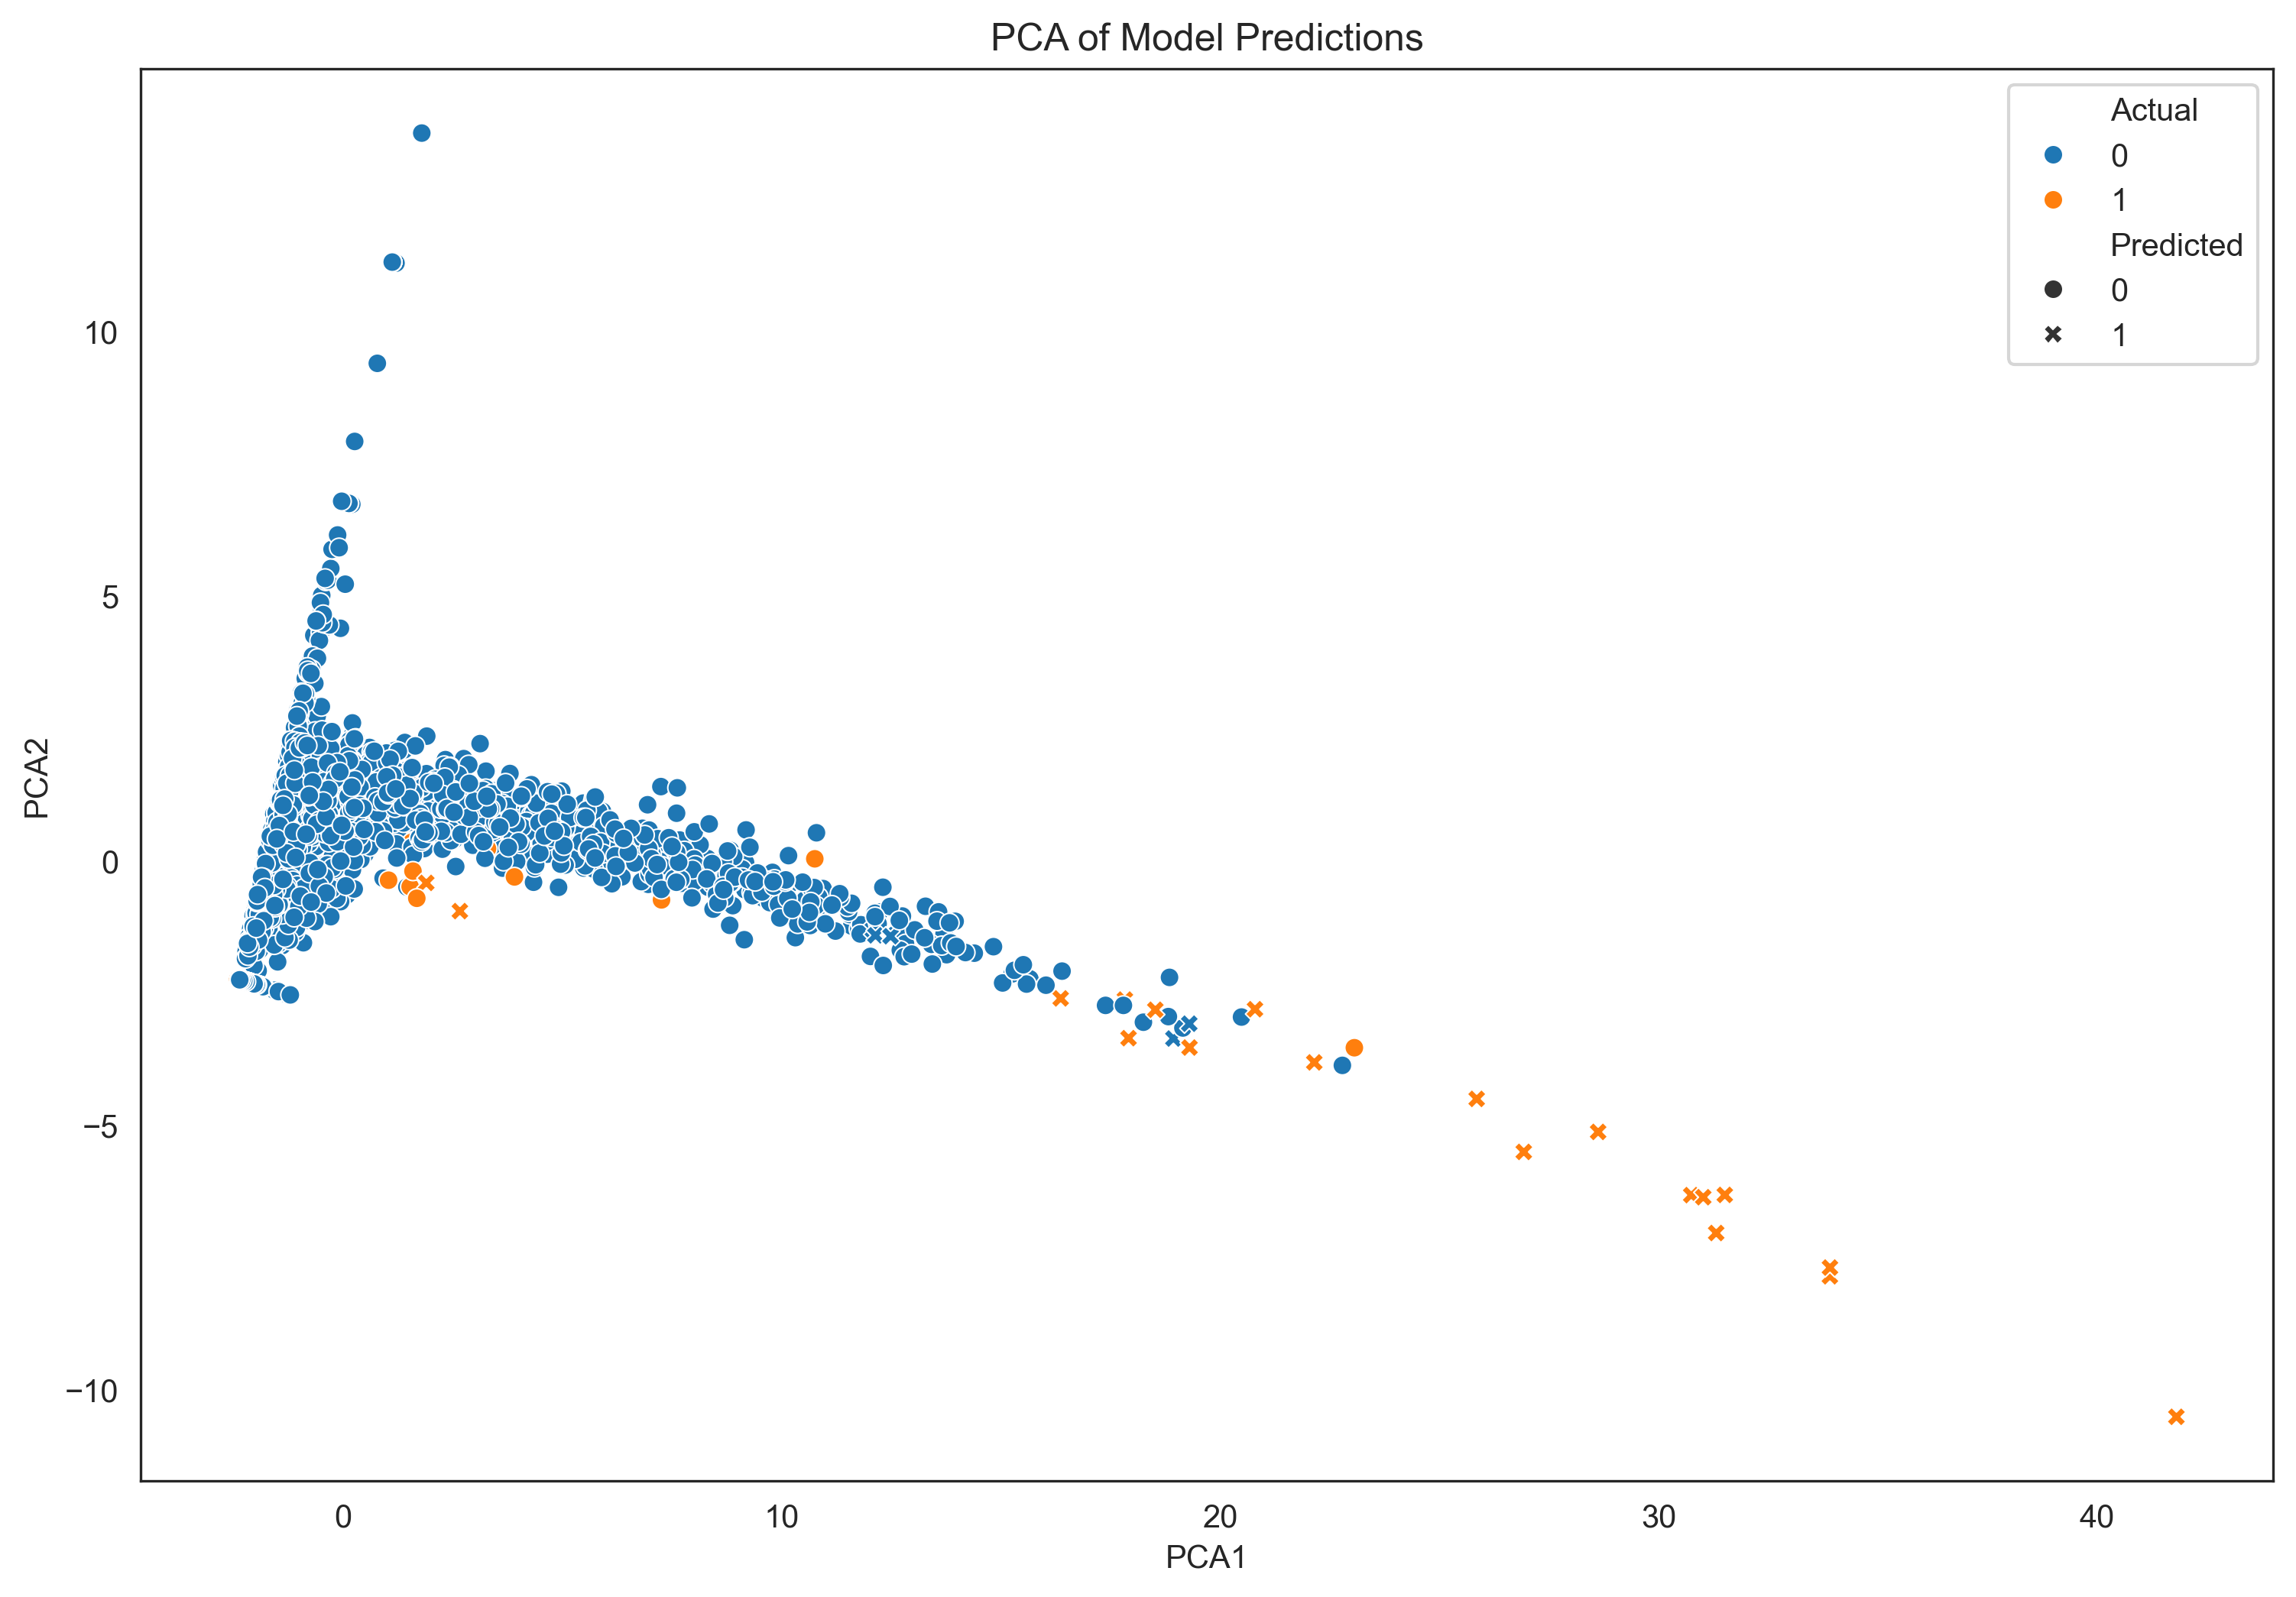

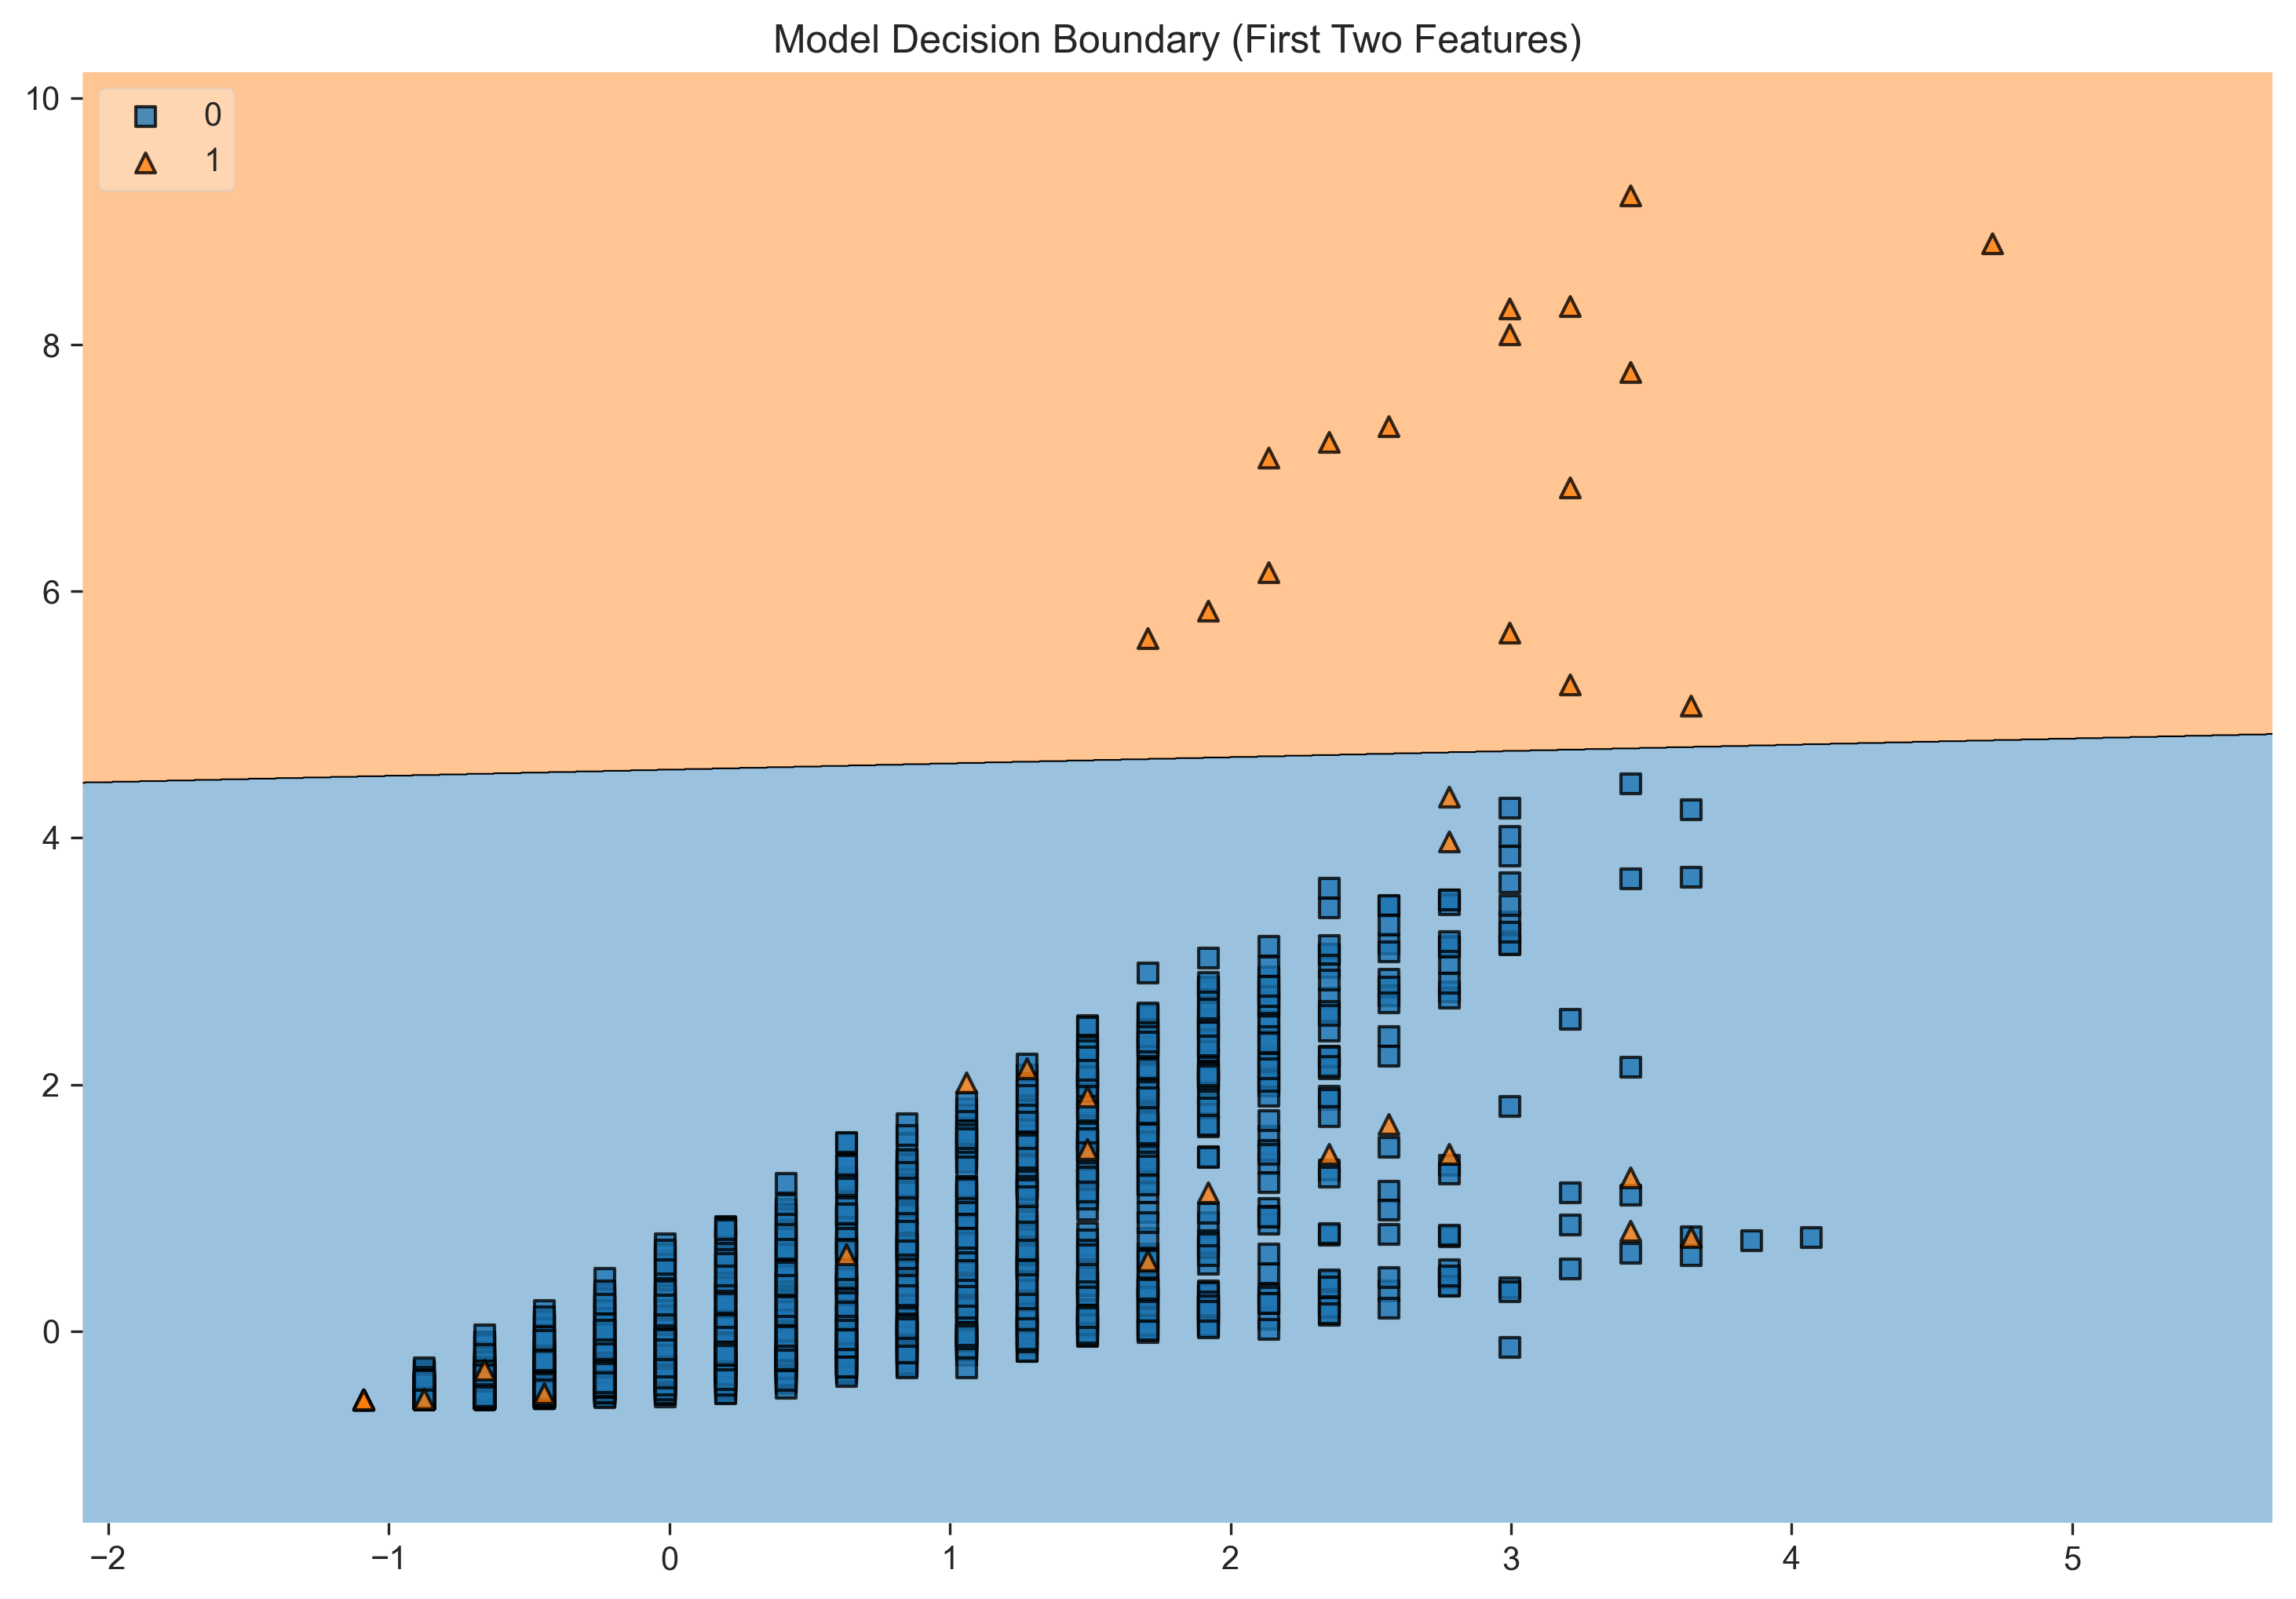

In [177]:
# Feature Importance Visualization (if supported)
if hasattr(log_model_1, 'feature_importances_'):
    importances = log_model_1.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importances)
    plt.title("Feature Importances")
    plt.show()

# Player Data Comparison for False Positives
false_positive_example = Awards_Batting_HoF_df.loc[false_positives].copy()
plt.figure(figsize=(12, 8))
sns.barplot(data=false_positive_example.melt(id_vars='playerID', value_vars=X.columns), x='variable', y='value')
plt.xticks(rotation=90)
plt.title("Features of False Positive Players")
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
visual_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Actual': y_test_reset,
    'Predicted': y_pred_reset
})
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visual_df, x='PCA1', y='PCA2', hue='Actual', style='Predicted')
plt.title("PCA of Model Predictions")
plt.show()

# Decision Boundary Visualization (only two features for logistic regression)
X_test_sample = X_test_scaled[:, :2]  # Use the first two features
log_model_2 = LogisticRegression().fit(X_train_scaled[:, :2], y_train)
plt.figure(figsize=(12, 8))
plot_decision_regions(X_test_sample, y_test_reset.to_numpy(), clf=log_model_2, legend=2)
plt.title("Model Decision Boundary (First Two Features)")
plt.show()


Feature Engineering career stats rather than season stats.